In [2]:
import os
from dotenv import load_dotenv
from langchain.chat_models import init_chat_model
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
model =init_chat_model("groq:qwen/qwen3-32b")

In [3]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from IPython.display import Image,display

class State(TypedDict):
    topic:str
    characters:str
    settings:str
    premises:str
    story_intro:str

In [5]:
def generate_character(state:State):
    """Generate character descriptions"""
    msg = model.invoke(f"Create two character names and brief traits for a story about {state['topic']}")

    return {"characters":msg.content}


def generate_settings(state:State):
    """Generate a story settings"""
    msg = model.invoke(f"describe a vivid setting for a story about {state['topic']}")

    return {"settings":msg.content}

def generate_premise(state:State):
    """Generate a story premise"""
    msg = model.invoke(f"Write a one sentence plot premise for a story about {state['topic']}")

    return {"premises":msg.content}

In [7]:
def combine_elements(state:State):
    """Combine characters, settings and into an intro"""
    msg = model.invoke(
        f"Write a short introduction using these elements: \n"
        f"characters: {state['characters']}\n"
        f"settings: {state['settings']}\n"
        f"Premise: {state['premises']}"
    )

    return {"story_intro":msg.content}

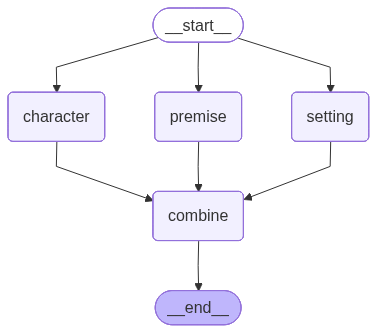

In [10]:
graph = StateGraph(State)
graph.add_node("character",generate_character)
graph.add_node("setting",generate_settings)
graph.add_node("premise",generate_premise)
graph.add_node("combine",combine_elements)


graph.add_edge(START,"character")
graph.add_edge(START,"setting")
graph.add_edge(START,"premise")
graph.add_edge("character","combine")
graph.add_edge("setting","combine")
graph.add_edge("premise","combine")
graph.add_edge("combine",END)

compiled_graph = graph.compile()
graph_image = compiled_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [11]:
state = {"topic":"time travel"}
result = compiled_graph.invoke(state)
result["story_intro"]

"<think>\nOkay, let's tackle this story concept. The user wants a short, self-contained narrative using the provided elements—characters, settings, and premise. First, I need to integrate the two characters, Dr. Elara Voss and Kael Marrow, into the Chrono-Library of Eon’s Spire. The setting is already rich with temporal anomalies and the library’s dangers. The premise involves a physicist dealing with a time-travel paradox that threatens humanity.\n\nStarting with Elara, she's driven by personal loss, so maybe her motivation is tied to saving her sister. Her recklessness makes sense if she's risking everything for her. Kael, being a rogue time traveler, could have a hidden agenda. Perhaps he's been through the library before and knows the risks but is still there for his own reasons.\n\nThe library's setting is perfect for a time-travel story with its infinite corridors and the Heart of Now. I need to show the library's mystical aspects, like the books bound in stardust and the Vault o